## An example using Graph as a weighted network.
## Author: Aric Hagberg (hagberg@lanl.gov)

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.0-preview/spark-3.0.0-preview-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-preview-bin-hadoop2.7.tgz
!pip install -q findspark
#!apt-get install python-software-properties
#!add-apt-repository ppa:igraph/ppa /y
#!apt-get update
#!pip install -q python-igraph
#from google.colab import drive
#drive.mount('/content/foo_directory')
from google.colab import drive
drive.mount('/content/drive')
#Ruta raiz
PATH = "/content/drive/My Drive/ConcursoDotCsv/Dataset/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
from time import sleep
from pyspark.streaming import StreamingContext
#Spark Contexto
#df = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

from pyspark.sql import SparkSession

ss = SparkSession \
    .builder \
    .appName("Dijkstra") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
    
sc.version 

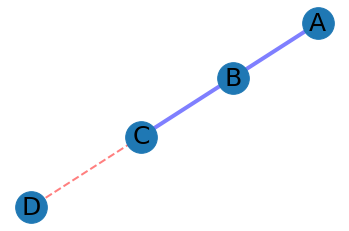

In [0]:
#!/usr/bin/env python
try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.Graph()

G.add_edge('A','B', weight=1.0)
G.add_edge('B','C', weight=1.0)
G.add_edge('C','D', weight=0.5)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       node_size=1000)

# edges
nx.draw_networkx_edges(G,pos,
                       edgelist = elarge,
                       width = 4,
                       alpha = 0.5,
                       edge_color='b')
                      

nx.draw_networkx_edges(G,pos,
                       edgelist = esmall,
                       width = 2,
                       alpha = 0.5,
                       edge_color ='r',
                       arrowstyle='-|>',
                       arrowsize = 2,
                       min_target_margin = 10,
                       label = 'TESTTESTTESTTESTTESTTESTTEST',
                       style='dashed')


# labels
nx.draw_networkx_labels(G,pos,font_size=25,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

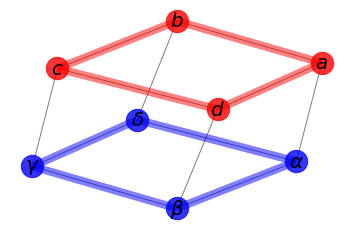

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G)  # positions for all nodes

# nodes NOS
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

# edges BORDAS
nx.draw_networkx_edges(G, pos, 
                       width=1.0, 
                       alpha=0.5)

nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, 
                       alpha=0.5, 
                       edge_color='r')

nx.draw_networkx_edges(G, pos,
                       edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
                       width=8, 
                       alpha=0.5, 
                       label = 'teste',
                       edge_color='b')

# some math labels
labels = {}
labels[0] = r'$a$'
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'

nx.draw_networkx_labels(G, pos, labels, font_size=20)

plt.axis('off')
plt.show()


['Hüsker Dü', 'Motörhead', 'Mötley Crüe', 'Spın̈al Tap', 'Blue Öyster Cult', 'Deathtöngue', 'Queensrÿche']


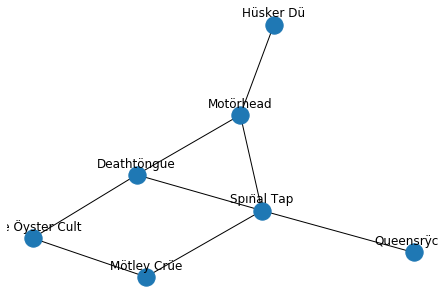

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

try:
    hd = 'H' + unichr(252) + 'sker D' + unichr(252)
    mh = 'Mot' + unichr(246) + 'rhead'
    mc = 'M' + unichr(246) + 'tley Cr' + unichr(252) + 'e'
    st = 'Sp' + unichr(305) + 'n' + unichr(776) + 'al Tap'
    q = 'Queensr' + unichr(255) + 'che'
    boc = 'Blue ' + unichr(214) + 'yster Cult'
    dt = 'Deatht' + unichr(246) + 'ngue'
except NameError:
    hd = 'H' + chr(252) + 'sker D' + chr(252)
    mh = 'Mot' + chr(246) + 'rhead'
    mc = 'M' + chr(246) + 'tley Cr' + chr(252) + 'e'
    st = 'Sp' + chr(305) + 'n' + chr(776) + 'al Tap'
    q = 'Queensr' + chr(255) + 'che'
    boc = 'Blue ' + chr(214) + 'yster Cult'
    dt = 'Deatht' + chr(246) + 'ngue'

G = nx.Graph()
G.add_edge(hd, mh)
G.add_edge(mc, st)
G.add_edge(boc, mc)
G.add_edge(boc, dt)
G.add_edge(st, dt)
G.add_edge(q, st)
G.add_edge(dt, mh)
G.add_edge(st, mh)

# write in UTF-8 encoding
fh = open('edgelist.utf-8', 'wb')
fh.write('# -*- coding: utf-8 -*-\n'.encode('utf-8'))  # encoding hint for emacs
nx.write_multiline_adjlist(G, fh, delimiter='\t', encoding='utf-8')

# read and store in UTF-8
fh = open('edgelist.utf-8', 'rb')
H = nx.read_multiline_adjlist(fh, delimiter='\t', encoding='utf-8')

for n in G.nodes():
    if n not in H:
        print(False)

print(list(G.nodes()))

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G, pos)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

G=nx.path_graph(100)
print(nx.dijkstra_path(G,1,9))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [0]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_nodes_from([1, 2]) #arestas
G.add_edges_from([(1, 2), (1, 3)])#bordas
